# Advertising Project - Group 15
## Shreya Bhootda, Ishan Patel, Serena Wu, Shengxiang Wu

### Q1 - Q4


In [1]:
#We worked this problem on Google Colab.

#Use this if on Google Colab
%pip install -i https://pypi.gurobi.com gurobipy

Looking in indexes: https://pypi.gurobi.com
     |████████████████████████████████| 11.1 MB 4.4 MB/s 


In [4]:
import pandas as pd
import numpy as np
import gurobipy as gp
from matplotlib import pyplot as plt

#### First ROI

In [ ]:
#Use this if on Jupyter Notebook

# read ROI data set
df = pd.read_csv('ROI_data.csv')
df

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [2]:
#Use this if on Google Colab

from google.colab import files
  
  
uploaded = files.upload()

Saving ROI_data.csv to ROI_data.csv


In [5]:
#Use this if on Google Colab

import io

# read ROI data set 
df = pd.read_csv(io.BytesIO(uploaded['ROI_data.csv']))
df

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [6]:
df.set_index('Platform').T

Platform,ROI,Second Firms ROI Estimate
Print,0.031,0.049
TV,0.049,0.023
SEO,0.024,0.024
AdWords,0.039,0.039
Facebook,0.016,0.044
LinkedIn,0.024,0.046
Instagram,0.046,0.026
Snapchat,0.026,0.019
Twitter,0.033,0.037
Email,0.044,0.026


Text(0, 0.5, 'Percentage')

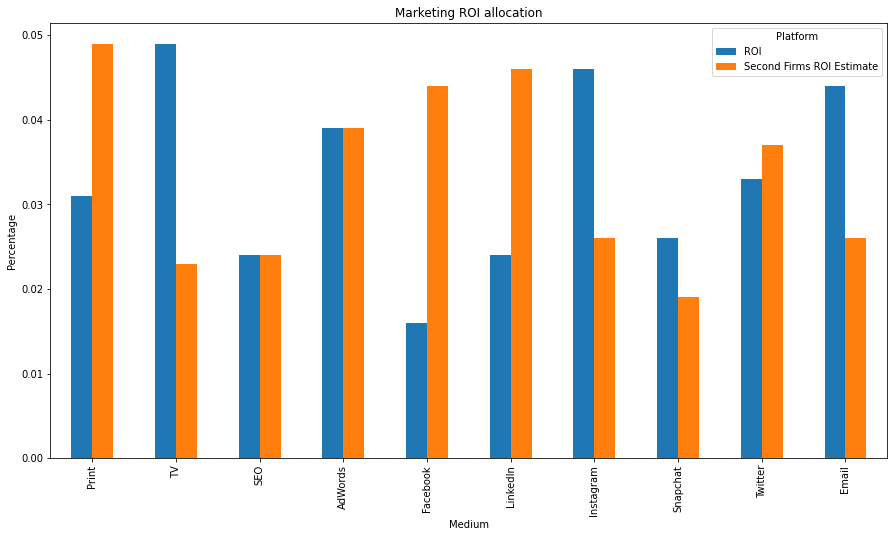

In [7]:
from matplotlib.pyplot import figure


df.set_index('Platform').T.plot(kind = 'bar',figsize=(15, 8))

plt.title("Marketing ROI allocation")
plt.xlabel("Medium")
plt.ylabel("Percentage")

The above barplot illustrates the difference in the marketing strategy between the two firms. We can see that the second firm is concetrating more on advertising via **Print** and social media platforms like **LinkeIn, Facebook and Twitter**. The one thing commong among these platforns is that it facilitates putting across the message across via text as compared to just visuals i.e pictures, videos etc. 

In [8]:
#Instead of hardcoding the ROIs, create a loop to take each ROI from the first row into an objective vector
obj1 = np.zeros(10)
for i in range(10):
    obj1[i] = df.iloc[0, i+1]

In [9]:
A = np.zeros((13,10)) 
A[0:10,:] = np.identity(len(obj1)) #Each platform constraint
A[10,:] = [1,1,0,0,-1,0,0,0,0,-1] #No more than FaceBook and Email
A[11,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] #at least twice of AdWords and SEO
A[12,:] = 1

b = np.array([3,3,3,3,3,3,3,3,3,3,0,0,10]) #The RHS of the constraints vector
sense = np.array(['<']*13) 

In [10]:
print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [11]:
ROIModel1 = gp.Model() # initialize an empty model

ROIModX1 = ROIModel1.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ROIModCon1 = ROIModel1.addMConstrs(A, ROIModX1, sense, b) # add the constraints to the model
ROIModel1.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ROIModel1.Params.OutputFlag = 0 # tell gurobi to shut up!!

Restricted license - for non-production use only - expires 2022-01-13


In [12]:
ROIModel1.optimize() # solve the LP

In [13]:
ROIopt1 = ROIModel1.objVal # optimal profit level
ROIopt1

0.45600000000000007

In [14]:
alloc1 = ROIModX1.x #Solution for allocations
alloc1 

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

Based on the first ROI, we have found the optimal allocation **[0., 3., 0., 1., 0., 0., 3., 0., 0., 3.]** on **[Print,	TV,	SEO,	AdWords,	Facebook,	LinkedIn,	Instagram,	Snapchat,	Twitter,	Email]**. Using such solution as allocation, we are expecting to have ROI of 0.456 millions as our optimized return.

#### Second ROI

In [15]:
#Instead of hardcoding the ROIs, create a loop to take each ROI from the second row into an objective vector
obj2 = np.zeros(10)
for i in range(10):
    obj2[i] = df.iloc[1, i+1]

A = np.zeros((13,10)) 
A[0:10,:] = np.identity(len(obj2)) #Each platform constraint
A[10,:] = [1,1,0,0,-1,0,0,0,0,-1] #No more than FaceBook and Email
A[11,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] #at least twice of AdWords and SEO
A[12,:] = 1

b = np.array([3,3,3,3,3,3,3,3,3,3,0,0,10]) #The RHS of the constraints vector

sense = np.array(['<']*13)  

ROIModel2 = gp.Model() # initialize an empty model

ROIModX2 = ROIModel2.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ROIModCon2 = ROIModel2.addMConstrs(A, ROIModX2, sense, b) # add the constraints to the model
ROIModel2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ROIModel2.Params.OutputFlag = 0 # tell gurobi to shut up!!

ROIModel2.optimize() # solve the LP

ROIopt2 = ROIModel2.objVal # optimal profit level
print(ROIopt2)

alloc2 = ROIModX2.x #Solution for allocations
print(alloc2)

0.45600000000000007
[3. 0. 0. 1. 3. 3. 0. 0. 0. 0.]


Based on the second ROI, we have found the optimal allocation **[3. 0. 0. 1. 3. 3. 0. 0. 0. 0.]** on **[Print, TV, SEO, AdWords, Facebook, LinkedIn, Instagram, Snapchat, Twitter, Email]**. Using such solution as allocation, we are also expecting to have ROI of 0.456 millions as our optimized return.

However, as our solution shows, we have allocated different amount of money on different platform since the ROI provided has been changed. 

### Q5

In [16]:
#First ROI but Second Allocation
optRev = np.matmul(obj1,alloc2) #get the revenue based on the ROI and allocation
ROIopt1 - optRev #find the difference between the optimal and calculated revenue

0.20400000000000007

In [17]:
#Second ROI but First Allocation
optRev = np.matmul(obj2,alloc1)#get the revenue based on the ROI and allocation
ROIopt2 - optRev #find the difference between the optimal and calculated revenue

0.19200000000000006

The optimal revenues are same, but the allocations are not the same. 
So if you use the first ROI but second allocation, you lose 0.204M compared to the optimal revenue revenue. If the second ROI is correct but you use the first allocation, you lose 0.192M compared to the optimal revenue value. The third constraint can be useful so you dont invest all your money in a small amount of platforms, therefore increasing your risk in your portfolio. It allows diversification with keeping risk in check.

### Q6

In [18]:
ROIModX1.SAObjLow #Smallest objective value at which the current optimal basis would remain optimal

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [19]:
ROIModX1.SAObjUp #Largest objective value at which the current optimal basis would remain optimal

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

As our answer shown above, the ROI of  **[Print,	TV,	SEO,	AdWords,	Facebook,	LinkedIn,	Instagram,	Snapchat,	Twitter,	Email]**  need to decrease to  **[-inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf, 0.029]**  in order to change our optimal solution. 

On the other hand, **[Print,	TV,	SEO,	AdWords,	Facebook,	LinkedIn,	Instagram,	Snapchat,	Twitter,	Email]**  will need to increase to **[0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039, inf]** to change our optimal solution.

### Q7

In [ ]:
#Use this if on Jupyter Notebook

# read ROI data set
df_roi = pd.read_csv('roi_mat.csv')
df_roi


In [20]:
#Use this if on Google Colab

from google.colab import files
  
  
uploaded = files.upload()

Saving roi_mat.csv to roi_mat.csv


In [21]:
#Use this if on Google Colab

import io

# read ROI data set 
allocation = pd.read_csv(io.BytesIO(uploaded['roi_mat.csv']), index_col=0, header=0)
allocation = allocation*0.01
allocation

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034
October,0.030,0.030,0.031,0.046,0.031,0.033,0.032,0.0230,0.025,0.032


In [22]:
# expected roi for each month
obj_month = np.zeros(10)
for i in range(10):
    obj_month[i] = df.iloc[0, i+1]
    
monthly_allocation = np.zeros((12,12))
budget = 10
for i in range(12):
    monthly_allocation[i,11] = budget
    A = np.zeros((13, 10)) 
    A[0,:] = np.ones(10) 
    A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] 
    A[2,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] 
    A[3:13,0:10] = np.diag(np.ones(10))
    b = np.array([budget, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]) 
    sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) 
    ROIModel = gp.Model() 
    ROIModX = ROIModel.addMVar(10)
    ROIModCon = ROIModel.addMConstrs(A, ROIModX, sense, b) 
    ROIModel.setMObjective(None,obj_month,0,sense=gp.GRB.MAXIMIZE) 
    ROIModel.Params.OutputFlag = 0 
    ROIModel.optimize()
    monthly_allocation[i,0:10] = ROIModX.x
    profit = ROIModX.x @ allocation.iloc[i]
    monthly_allocation[i,10] = profit
    budget = 10 + 0.5*profit

monthly_allocation = pd.DataFrame(monthly_allocation, columns=['Print','TV','SEO','AdWords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email','Return','Budget'], index=list(allocation.index))
monthly_allocation

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Return,Budget
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.0,3.0,0.360000,10.000000
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.0,3.0,0.347840,10.180000
March,0.0,3.0,0.0,1.173920,0.0,0.0,3.0,0.0,0.0,3.0,0.317609,10.173920
April,0.0,3.0,0.0,1.158804,0.0,0.0,3.0,0.0,0.0,3.0,0.341987,10.158804
May,0.0,3.0,0.0,1.170994,0.0,0.0,3.0,0.0,0.0,3.0,0.369814,10.170994
June,0.0,3.0,0.0,1.184907,0.0,0.0,3.0,0.0,0.0,3.0,0.394287,10.184907
July,0.0,3.0,0.0,1.197143,0.0,0.0,3.0,0.0,0.0,3.0,0.403674,10.197143
August,0.0,3.0,0.0,1.201837,0.0,0.0,3.0,0.0,0.0,3.0,0.386477,10.201837
September,0.0,3.0,0.0,1.193239,0.0,0.0,3.0,0.0,0.0,3.0,0.320116,10.193239
October,0.0,3.0,0.0,1.160058,0.0,0.0,3.0,0.0,0.0,3.0,0.335363,10.160058


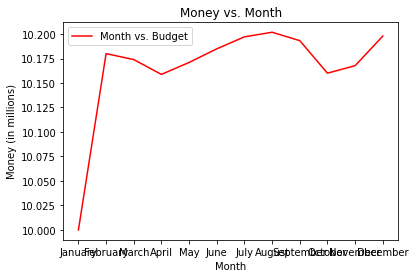

In [23]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(monthly_allocation.index, monthly_allocation['Budget'],linestyle='-', color='r',label='Month vs. Budget')
    
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Month')
plt.ylabel('Money (in millions)')
plt.title('Money vs. Month')
ax.legend()
plt.axis('tight')
plt.show()
    

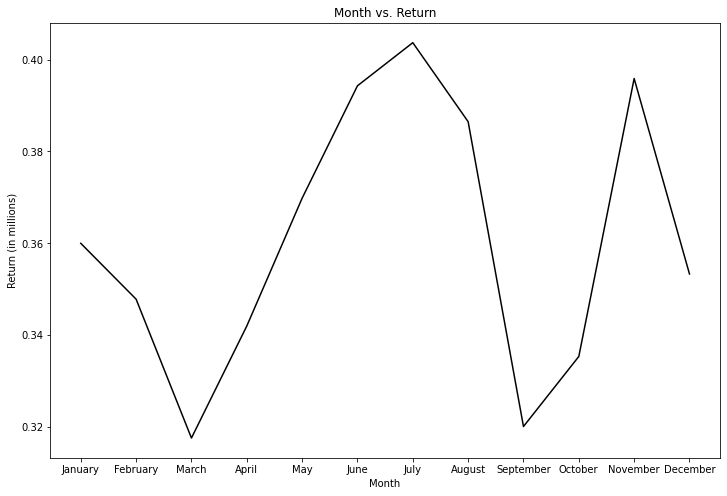

In [24]:
ax2 = plt.gca()

ax2.plot(monthly_allocation.index, monthly_allocation['Return'],linestyle='-', color='black',label='Month vs. ROI')

plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Month')
plt.ylabel('Return (in millions)')
plt.title('Month vs. Return')
ax.legend()
plt.axis('tight')
plt.show()
    

The answer is shown in dataframe. We are using the first ROI as a forcasting ROI, and using ROI provided in the excel each month as true ROI to calculate the actual return.
Based on the plot, we can see that our budget and total amount of money are increasing steadily, but the return we earned changes a lot. The return in Oct. is considerably low although the budget of Oct. is over 12.2 millions. 

### Q8

The monthly allocation is stable as allocations do not change by more than a million during different months.
